In [62]:
from sympy import symbols, Function, dsolve, Eq, diff
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [ ]:
Вариант 5.  A+B→C.

In [147]:
# ввод символов
t = symbols('t')
x = Function('x')(t)
k, a0, b0 = symbols('k a0 b0')

In [149]:
v = k * a0 * b0 # задаем скорость реакции,которая пропорциональна произведению концентраций

In [151]:
# скорость реакции и кинетическое уравнение
a = a0 - x
b = b0 - x
da_dt = -k * a * b
eq = Eq(diff(x, t), da_dt)

In [169]:
# для символьного подхода, не используется дальше
ics = {x.subs(t, 0): 0} # initial conditions
sol = dsolve(eq, x, ics=ics)#аналитическое решение
# print("аналитическое решение :", sol)

In [173]:
# строим график с численным решением, аналит. решение найти не удалось
def model(x, t, k, a0, b0): # определяет скорость изменения x
    a = a0 - x
    b = b0 - x
    dx_dt = k * a * b
    return dx_dt

In [179]:
# параметры для численного решения
k_val, a0_val, b0_val = 0.1, 1.0, 0.5  # начальные концентрации
x0 = 0.0  # начальная убыль x(0) = 0
t_vals = np.linspace(0, 5, 100)  # временной интервал

In [193]:
# решение
x_vals = odeint(model, x0, t_vals, args=(k_val, a0_val, b0_val)).flatten()
a_vals = a0_val - x_vals# концентрации для графиков 
b_vals = b0_val - x_vals
c_vals = x_vals 

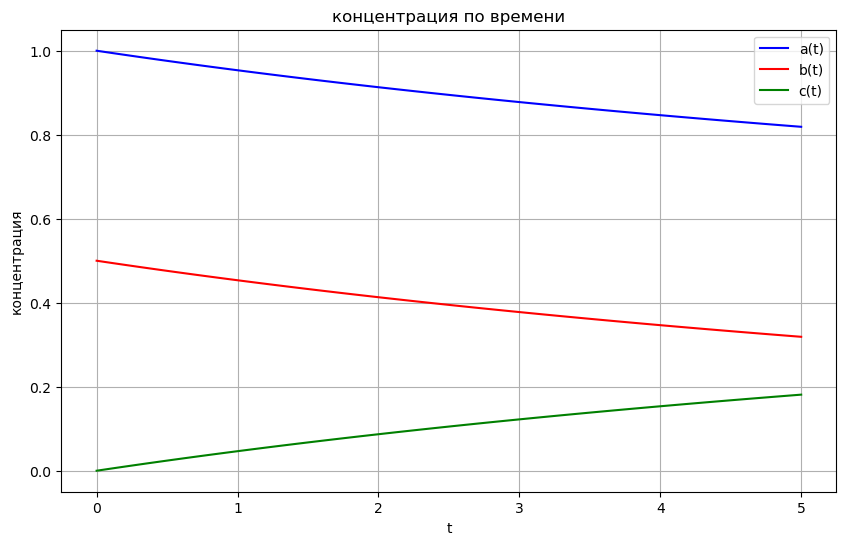

In [196]:
plt.figure(figsize=(10, 6))
plt.plot(t_vals, a_vals, 'b-', label='a(t)')
plt.plot(t_vals, b_vals, 'r-', label='b(t)')
plt.plot(t_vals, c_vals, 'g-', label='c(t)')
plt.xlabel('t')
plt.ylabel('концентрация')
plt.title('концентрация по времени')
plt.legend()
plt.grid(True)
plt.show()